In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

Classification problem: Iris data

Iris data from python package was chosen for the gradient descent modeling. For simplication, we chose the only two features for the dataset, including sepal width and sepal length. 

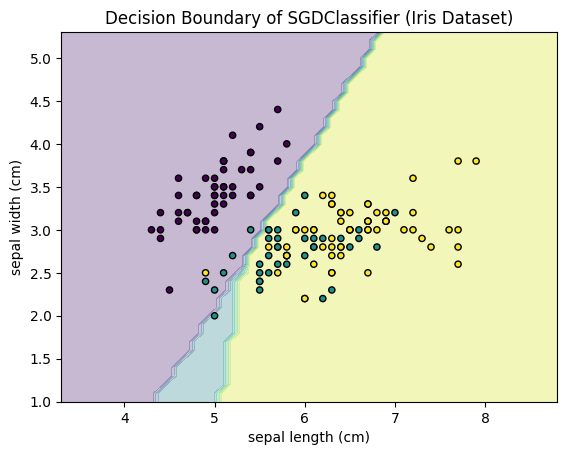

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SGDClassifier with logistic regression loss
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# Define the meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create decision boundary data
Z = sgd_clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape decision boundary data
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Decision Boundary of SGDClassifier (Iris Dataset)')
plt.show()


The accuracy is defined as the proportion of correctly classified instances out of the total number of instances in the test dataset. Mathematically, it is calculated as:

$$
\text{Accuracy} = \frac{Number of Corrected Predictions}{Number of Total Predictions}
$$

In [3]:
from sklearn.metrics import accuracy_score

# Predict the labels for test data
y_pred = sgd_clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


It seems that the prediction accuracy of gradient descent for Iris dataset is not so good, we might change the dataset into breast cancer datasets.

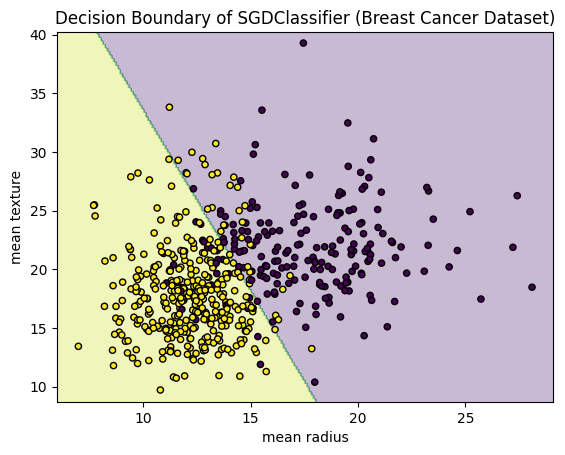

In [4]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Use only the first two features for visualization
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SGDClassifier with logistic regression loss
sgd_clf = SGDClassifier(loss='log_loss', random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

# Define the meshgrid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create decision boundary data
Z = sgd_clf.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))

# Reshape decision boundary data
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('Decision Boundary of SGDClassifier (Breast Cancer Dataset)')
plt.show()

In [5]:
# Predict the labels for test data
y_pred = sgd_clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9122807017543859


The accuracy seems a lot better in the breast cancer case. 

The discrepancy in accuracy and boundary clarity between the Iris dataset and the breast cancer dataset when using the SGDClassifier could be attributed to several factors:

1. Dataset Complexity:
- The Iris dataset is relatively simple with only four features and three classes, whereas the breast cancer dataset is more complex with multiple features and two classes.
- SGDClassifier may struggle to effectively capture the underlying patterns in the Iris dataset due to its simplicity, leading to lower accuracy and misleading boundaries.

2. Linear Separability:
- The breast cancer dataset may exhibit better linear separability, making it easier for SGDClassifier to learn a decision boundary that effectively separates the two classes.
- On the other hand, the Iris dataset may not be as linearly separable, requiring a more complex decision boundary that SGDClassifier may struggle to learn efficiently.

3. Feature Scaling:
- SGDClassifier, being a gradient descent-based algorithm, is sensitive to the scale of features. If the features in the Iris dataset are not properly scaled, it may affect the convergence of the algorithm and the performance of the model.

4. Model Hyperparameters:
- The performance of SGDClassifier can be highly sensitive to its hyperparameters, such as the learning rate, regularization strength, and number of iterations.
- Experimenting with different hyperparameter values and performing hyperparameter tuning using techniques like grid search or random search may help improve the model's performance on the Iris dataset.

Overall, the differences in accuracy and boundary clarity between the two datasets when using SGDClassifier may be attributed to variations in dataset complexity, linear separability, feature scaling, class imbalance, and model hyperparameters. Analyzing these factors and appropriately addressing them can help improve the performance of SGDClassifier on the Iris dataset.